Monte Carlo Value at Risk (VaR)

In [2]:
#Libraries

import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
#Setting the historical time to extract data from
years = 10
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days = 365*years)


In [4]:
#Setting Names of Specific Stocks
st_ticks = ["AAPL" , "NVDA" , "META", "AMZN" , "AMD" , "XOM" , "CVX" , "EOG" , "SHEL" , "DVN", "TSLA", "XPEV" , "NIO" , "RIVN" , "LCID"]


In [5]:
adj_close_df = pd.DataFrame()
for st in st_ticks:
    data = yf.download(st, start = start_date, end = end_date) 
    adj_close_df[st] = data["Adj Close"]

print(adj_close_df)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [6]:
log_returns = np.log(adj_close_df/adj_close_df.shift(1))
log_returns = log_returns.dropna()

print(log_returns)


                AAPL      NVDA      META      AMZN       AMD       XOM  \
Date                                                                     
2021-11-11 -0.000338  0.031114  0.000305 -0.002746  0.042962  0.001868   
2021-11-12  0.014235  0.000000  0.039339  0.015048  0.012794 -0.007649   
2021-11-15  0.000067 -0.012083  0.019377  0.005807 -0.009512  0.008581   
2021-11-16  0.006645  0.005911 -0.013323 -0.001405  0.039879  0.010047   
2021-11-17  0.016356 -0.031686 -0.006406  0.002341 -0.007308 -0.010980   
...              ...       ...       ...       ...       ...       ...   
2024-03-22  0.005296  0.030736  0.003578  0.004033  0.005414  0.000000   
2024-03-25 -0.008335  0.007533 -0.012957  0.004685 -0.005694  0.010169   
2024-03-26 -0.006695 -0.026030 -0.014276 -0.007877 -0.004264 -0.007529   
2024-03-27  0.020991 -0.025284 -0.004102  0.008544  0.009624  0.010317   
2024-03-28 -0.010615  0.001174 -0.016908  0.003054  0.004999  0.010986   

                 CVX       EOG      S

In [7]:
def expected_return(weights, log_returns):
    return np.sum(log_returns.mean()*weights)
    

$$\Large{Choelsky decomposition to obtain portfolio standard deviation}$$

In [8]:
def std_dev(weights, cov_matrix):
    vari = weights.T @ cov_matrix @ weights
    return np.sqrt(vari)

$$\Large{CCreating a covariance matrix}$$

In [9]:
cov_mat = log_returns.cov()


In [13]:
portfolio_val = 500000
weights = np.array([1/len(st_ticks)]*len(st_ticks))
port_exp_return = expected_return(weights, log_returns)
port_std = std_dev(weights, cov_mat)

In [14]:
def r_zscore():
    return np.random.normal(0,1)

    

##Function to Caluclate Secnaion Gain or Loss

In [24]:
days = 5

def scenario_gain_loss(portfolio_val, port_std, zscore, days):
    return portfolio_val * port_exp_return * days + portfolio_val * port_std * zscore *np.sqrt(days)

In [25]:
simu = 1000

#Scenarion returns list
s_return = []

for i in range(simu):
    zscore = r_zscore()
    s_return.append(scenario_gain_loss(portfolio_val, port_std, zscore, days))

In [28]:
conf_int = 0.95
VaR = -np.percentile(s_return, 100*(1- conf_int))
print(VaR)

39881.114280813454


##Plotting Results

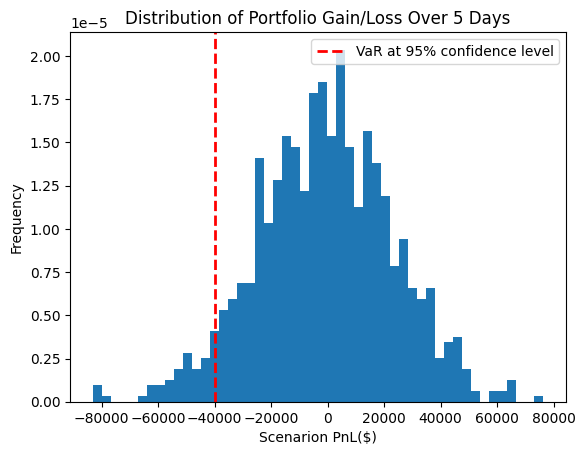

In [33]:
plt.hist(s_return, bins = 50, density= True)
plt.xlabel("Scenarion PnL($)")
plt.ylabel("Frequency")
plt.title("Distribution of Portfolio Gain/Loss Over 5 Days")
plt.axvline(-VaR, color = "r", linestyle = "dashed", linewidth = 2, label = f'VaR at {conf_int:.0%} confidence level')
plt.legend()
plt.show()
